# LIVE ASSIGNMENT - ELPORATORY DATA ANALYSIS

## EDA - 01 - Bike Details Dataset

**About - Dataset:**

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike market. 

This dataset helps understand factors influencing resale prices, usage patterns, and market trends for used bikes. 

**Source:** 

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms.  

Here is the dataset link: https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view

**Description:**

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand and model, selling price, kilometers driven, ownership history, and other attributes.

It is particularly useful for resale value prediction, market analysis, and understanding buyer preferences.  

The dataset consists of 7 features, combining both numeric and categorical data offering a comprehensive of the second-hand bike market. 


- name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")

- selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z

- year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z

- seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z

- owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z

- km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z

- ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

In [1]:
# Importing the required libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Ingestion 
df = pd.read_csv("BIKE DETAILS.csv")

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [5]:
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [7]:
df.shape

(1061, 7)

In [8]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [9]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [10]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

### Q.1  What is the range of selling prices in the dataset ?

In [11]:
sell_price_min = df['selling_price'].min() # Minimun selling price
sell_price_max = df['selling_price'].max() # Maximum selling price

sell_price_range = sell_price_max - sell_price_min # Range of selling price

# Displaying the results
print('Minimum Selling Price:',sell_price_min) # Minimum selling price  of the bike in the dataset
print('Maximum Selling Price:',sell_price_max) # Maximum selling price of the bike in the dataset   
print('Range of  Selling Price:',sell_price_range) # Range of selling price of the bike in the dataset

Minimum Selling Price: 5000
Maximum Selling Price: 760000
Range of  Selling Price: 755000


### Q.2 What is the median selling price for bikes in the dataset ?

In [12]:
# Calculate the median selling price
med_sell_price = df.selling_price.median() # Median selling price

print(f"Median selling price for bikes: {med_sell_price} rupees") # Display the median selling price

Median selling price for bikes: 45000.0 rupees


### Q.3 What is the most common seller type ?

In [13]:
df.seller_type.value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [14]:
# Find the most common seller type
most_common_seller_type = df['seller_type'].mode()[0]

print(f"The most common seller type is: {most_common_seller_type}") # Display the most common seller type

The most common seller type is: Individual


### Q.4 How many bikes have driven more than 50,000 kilometers ?

In [15]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [16]:
# Finding number od bikes that are driven more than 50000 km
over_50000_km = df[df['km_driven']>50000] 

total_count = over_50000_km.shape[0]

print(f"Total number of bikes with over 50000 km driven: {total_count}")

Total number of bikes with over 50000 km driven: 170


### Q.5 What is the average km_driven value for each ownership type ? 

In [17]:
df.owner.value_counts() # Count of bikes based on the number of owners

owner
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: count, dtype: int64

In [18]:
average_km_per_owner = df.groupby('owner')['km_driven'].mean() # Average km driven by each owner
average_km_per_owner

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

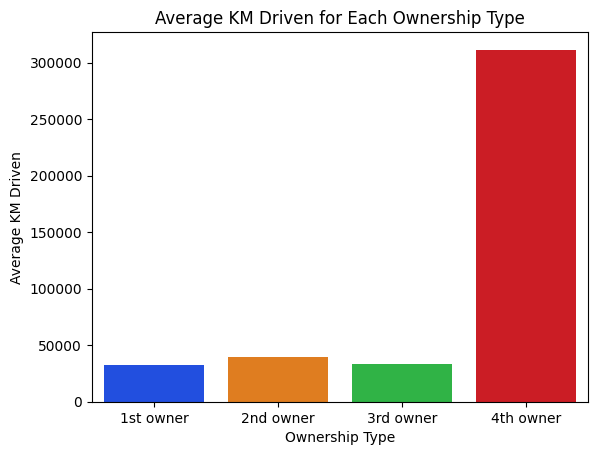

In [19]:
# Plotting the bar graph
sns.barplot(x=average_km_per_owner.index, y=average_km_per_owner.values,palette="bright") 

plt.title('Average KM Driven for Each Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.show()

In [20]:
# Insights from the graph above shows that the fourth owner has the highest average km driven that is 311500 km

### Q.6 What proportion of bikes are from the year 2015 or older ?

In [21]:
# Proportion of bikes from 2015 or older
older_bikes = df[df['year']<=2015] # Bikes from 2015 or older
prop_2015_or_older = (len(older_bikes) /len(df)*100) # Proportion

# Display the proportion of bikes from 2015 or older
print(f"Proportion of bikes from 2015 or older: {prop_2015_or_older:.2f}%")


Proportion of bikes from 2015 or older: 56.64%


In [22]:
# Interpretaion >>  56.64% of the bikes in the dataset are from 2015 or older.

### Q.7 What is the trend of missing values across the dataset ? 

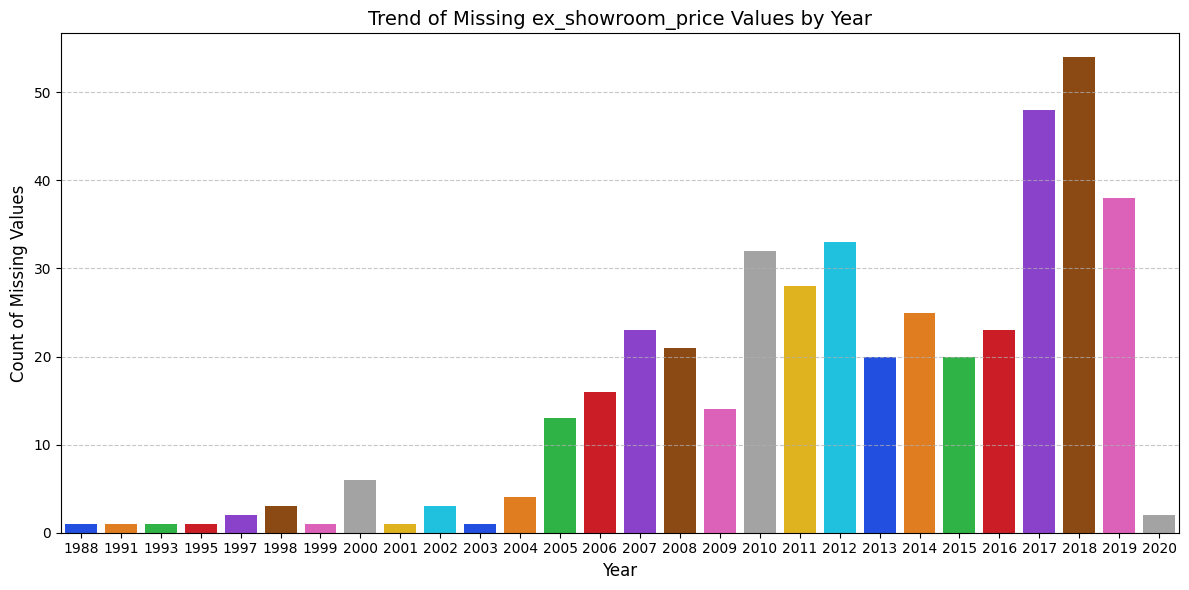

In [23]:

# Count missing values grouped by 'year'
missing_by_year = df[df['ex_showroom_price'].isnull()].groupby('year').size().reset_index(name='Missing Count')

# Plot the missing values trend using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=missing_by_year, x='year', y='Missing Count', palette='bright')
plt.title('Trend of Missing ex_showroom_price Values by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
# Interpretation >> The number of missing values for the 'ex_showroom_price' feature increases as the year increases. 
# This suggests that the data collection process may have changed over time, leading to more missing values in recent years 
# or tthe data was not collected for newer bikes and the new bikes are not sold yet.

### Q. 8 What is the highest ex_showroom_price recorded, and for which bike ?

In [25]:
# Find the highest ex_showroom_price and the corresponding bike
highest_ex_showroom_price = df['ex_showroom_price'].max()

highest_ex_showroom_price_bike = df[df['ex_showroom_price'] == highest_ex_showroom_price]['name'].values[0]

# Display the highest ex_showroom_price and the corresponding bike
print(f'The bike {highest_ex_showroom_price_bike} has the highest ex-showroom price of {highest_ex_showroom_price} rupees.')

The bike Harley-Davidson Street Bob has the highest ex-showroom price of 1278000.0 rupees.


### Q.9 What is the total number of bikes listed by each seller type ? 

In [26]:
# Number of bikes listed by seller type
seller_type_count = df['seller_type'].value_counts()

print(seller_type_count)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


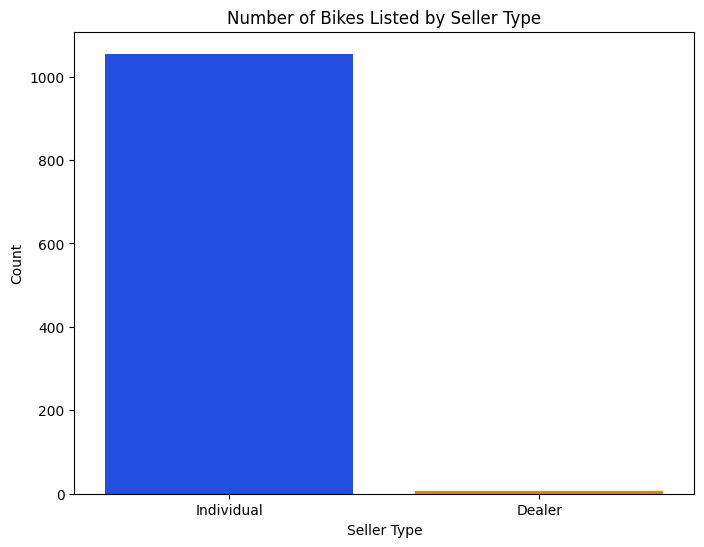

In [27]:
# Plotting the count of bikes listed by seller type
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='seller_type', palette='bright')

plt.title('Number of Bikes Listed by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')

plt.show()

In [28]:
#Interpretation >> There are 1055 bikes listed by individual sellers and 6 bikes listed by dealers.

### Q.10 What is the relationship between selling_price and km_driven for first-owner bikes ?

In [29]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

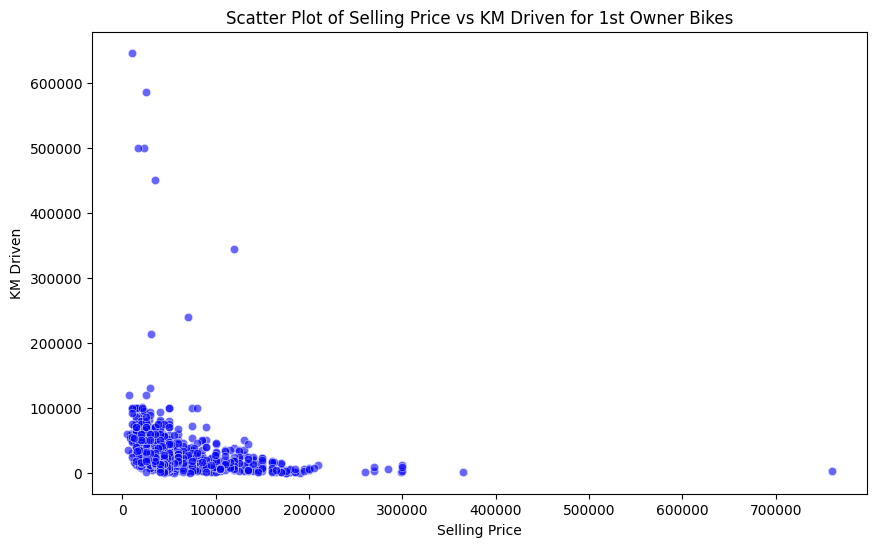

In [30]:
# Count of bikes based on the number of owners
first_owner = df[df['owner'] == '1st owner'] # Bikes with 1st owner

# Plotting the scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'selling_price', y = 'km_driven', data = first_owner, color = 'blue',alpha=0.6)

plt.title('Scatter Plot of Selling Price vs KM Driven for 1st Owner Bikes')
plt.xlabel('Selling Price')
plt.ylabel('KM Driven')
plt.show()


In [31]:
# Calculate the correlation coefficient between selling price and kilometers driven
correlation = first_owner['selling_price'].corr(first_owner['km_driven'])
print(f'Correlation coefficient between selling price and kilometers driven: {correlation}')


Correlation coefficient between selling price and kilometers driven: -0.24348174844965748


In [32]:
# Interpretation >> The coefficient value of -0.243 suggests that the decrease in price is not very strong or consistent with the number of kilometers driven.
# While there is some negative relationship, it is not a dominant factor influencing the selling price.

### Q.11 Identify and remove outliers in the km_driven column using the IQR method .

In [33]:
# Identify and remove outliers in the km_driven column using the IQR method .

Q1 = df['km_driven'].quantile(0.25) # First quartile
Q3 = df['km_driven'].quantile(0.75) # Third quartile

IQR = Q3 - Q1

lower_boundry = Q1 * 1.5 - IQR
upper_boundry = Q3 * 1.5 + IQR

# Identify outliers
outliers = df[(df['km_driven'] < lower_boundry) | (df['km_driven'] > upper_boundry)]

# Remove outliers
filtered_outliers = df[(df['km_driven'] > lower_boundry) & (df['km_driven'] < upper_boundry)]


In [34]:
# The number of outliers
outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
91,Honda Activa [2000-2015],22989,2012,Individual,1st owner,500000,50267.0
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
115,Hero Honda Passion Plus,7500,2004,Individual,1st owner,120000,NaN
154,Hero Xtreme Sports,22000,2014,Individual,1st owner,99000,78350.0
184,Honda CB Unicorn 160,75000,2015,Individual,1st owner,100000,79233.0
363,Hero Honda CD100SS,10000,1997,Individual,1st owner,646000,NaN
470,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0
477,Honda Activa [2000-2015],25000,2009,Individual,1st owner,585659,50267.0
511,Hero Splendor Plus,12000,2007,Individual,1st owner,100000,NaN
535,Hero Honda CD Deluxe,12000,2007,Individual,2nd owner,100000,NaN


In [35]:
filtered_outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


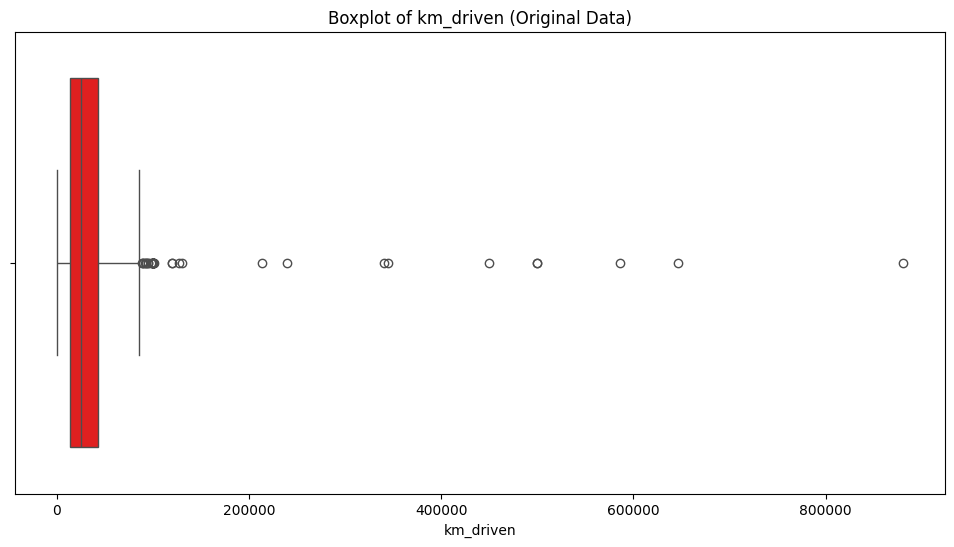

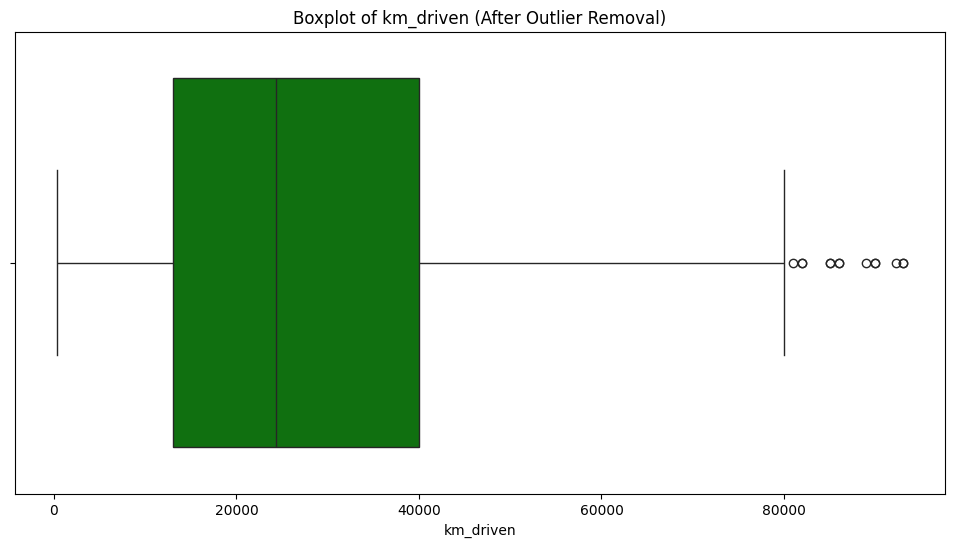

In [36]:
# Original data visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['km_driven'], color='red')
plt.title("Boxplot of km_driven (Original Data)")
plt.show()

# Visualize data after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_outliers['km_driven'], color='green')
plt.title("Boxplot of km_driven (After Outlier Removal)")
plt.show()

In [37]:
# Interpretation >> The boxplot after outlier removal shows that the data is now more evenly distributed without any extreme values and the median is more representative of the data.

### Q.12 Perform a bivariate analysis to visualize the relationship between year and selling_price .

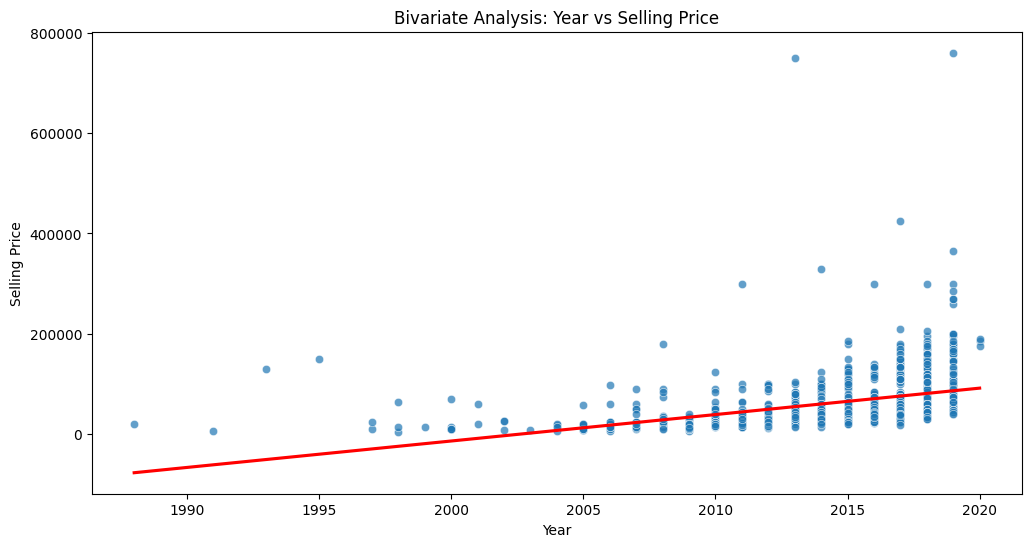

In [38]:

# Set up the plot size
plt.figure(figsize=(12, 6))

# Create a scatterplot for bivariate analysis
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.7)

# Add a trend line for better visualization
sns.regplot(data=df, x='year', y='selling_price', scatter=False, color='red', ci=None)

# Add titles and labels
plt.title("Bivariate Analysis: Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")

# Display the plot
plt.show()

In [39]:
# Insight >> newer bikes tend to have higher selling prices, as shown by the positive trend line in the scatter plot above and the price of bikes are increasing with the year.

### Q.13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [40]:
current_year = 2024

df['age'] = current_year - df['year']

# Group by age and calculate the average selling price
avg_price_by_age = df.groupby('age')['selling_price'].mean().reset_index()

# Calculate the overall average depreciation per year
avg_depreciation = avg_price_by_age['selling_price'].diff().mean()

# Display results
print("Average Selling Price by Age:")
print(avg_price_by_age)

print(f"\nAverage Depreciation per Year: {avg_depreciation:.2f}")

Average Selling Price by Age:
    age  selling_price
0     4  183333.333333
1     5  119689.511628
2     6   87660.374046
3     7   78894.736842
4     8   58469.018692
5     9   56500.000000
6    10   48668.131868
7    11   51136.986301
8    12   35748.400000
9    13   35655.721311
10   14   31793.333333
11   15   22267.857143
12   16   34289.285714
13   17   24927.586207
14   18   23380.000000
15   19   16978.571429
16   20   15100.000000
17   21    8000.000000
18   22   20666.666667
19   23   40000.000000
20   24   20833.333333
21   25   15000.000000
22   26   28333.333333
23   27   17500.000000
24   29  150000.000000
25   31  130000.000000
26   33    6000.000000
27   36   20000.000000

Average Depreciation per Year: -6049.38


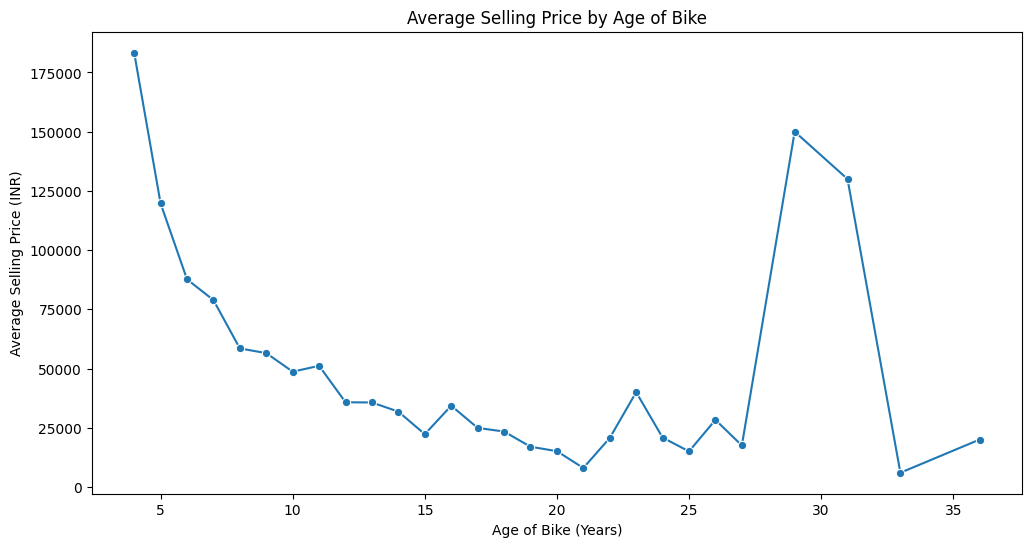

In [41]:
# Set up the plot size
plt.figure(figsize=(12, 6))

# Create a line plot for average selling price by age
sns.lineplot(data=avg_price_by_age, x='age', y='selling_price', marker='o')

# Add titles and labels
plt.title("Average Selling Price by Age of Bike")
plt.xlabel("Age of Bike (Years)")
plt.ylabel("Average Selling Price (INR)")

# Display the plot
plt.show()

In [42]:
# Insight >> The average selling price decreases as the age of the bike increases, indicating that older bikes tend to have lower selling prices. 
# Average Depreciation per Year is 6049.38 rupees. and there are some outliers in the data that did not follow the trend.

### Q.14 Which bike names are priced significantly above the average price for their manufacturing year ?

In [43]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,5
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,7
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,6
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,9
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,13
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,14
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,12
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,11
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,15


In [44]:
# Calculate the average selling price for each manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean()

# Merge the average prices with the original dataset
df['avg_price'] = df['year'].map(avg_price_by_year).round(2)

# Filter bikes priced above the average for their manufacturing year
above_avg_bikes = df[df['selling_price'] > df['avg_price']]

# Display the bike names that are priced above the average
above_avg_bikes[['name', 'year', 'selling_price', 'avg_price']]


,name,year,selling_price,avg_price
0,Royal Enfield Classic 350,2019,175000,119689.51
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.37
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,65000,56500.00
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.29
13,Yamaha YZF R3,2019,365000,119689.51
...,...,...,...,...
1004,Bajaj Pulsar NS 200,2016,60000,58469.02
1005,TVS Apache RTR 160,2014,60000,48668.13
1008,Bajaj Pulsar 220 F,2012,52000,35748.40
1012,Bajaj Pulsar NS 200,2014,50000,48668.13


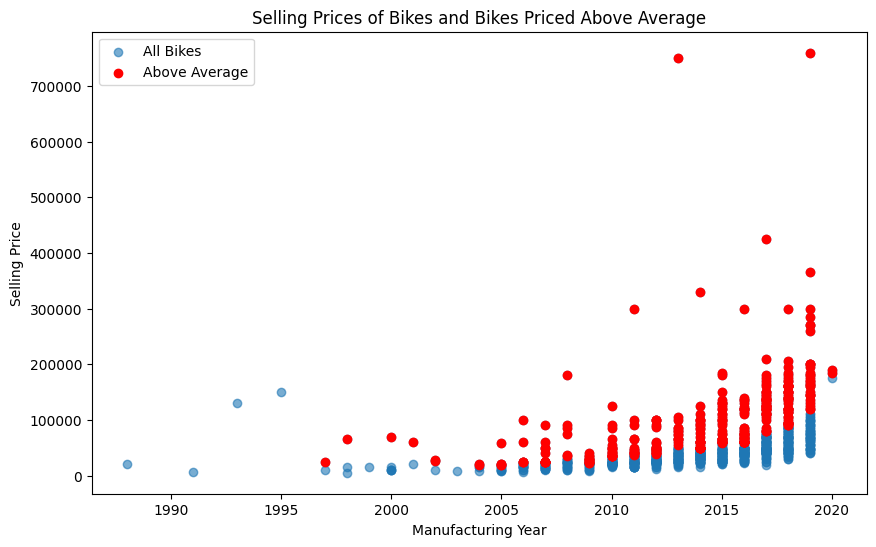

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], label='All Bikes', alpha=0.6)

plt.scatter(above_avg_bikes['year'], above_avg_bikes['selling_price'], color='red', label='Above Average')

plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.title('Selling Prices of Bikes and Bikes Priced Above Average')
plt.legend()

plt.show()


### Q.15 Develop a correlation matrix for numeric columns and visualize it using a heatmap. 

In [46]:
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

correlation_matrix


,selling_price,year,km_driven,ex_showroom_price,age,avg_price
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.402188,0.501140
year,0.402188,1.000000,-0.288675,0.126378,-1.000000,0.802547
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.288675,-0.309402
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,-0.126378,0.146598
age,-0.402188,-1.000000,0.288675,-0.126378,1.000000,-0.802547
avg_price,0.501140,0.802547,-0.309402,0.146598,-0.802547,1.000000


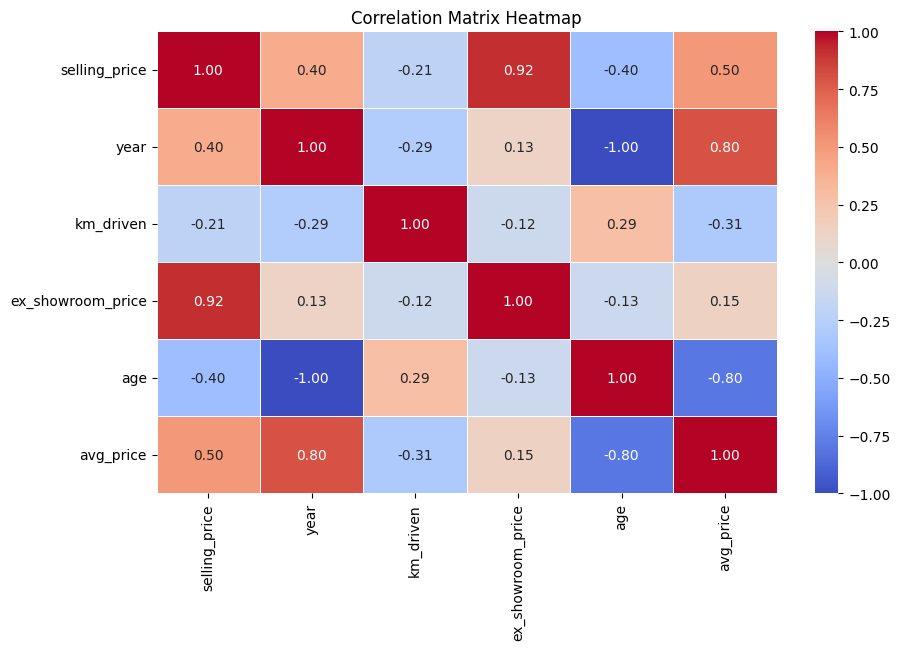

In [47]:
# correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [48]:
# Inshight >> The heatmap shows the correlation between different numeric features in the dataset.   
# The correlation coefficient ranges from -1 to 1, where 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.